First step is to import the required libraries, pandas and matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy
from scipy.stats import shapiro

print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"SciPy version: {scipy.__version__}")
    
def pandasAnswer(entry):
    print("\n----------------------------ANSWER----------------------------\n")
    print(entry)
    print("\n-------------------------END OF ANSWER-------------------------\n")

Pandas version: 2.2.3
Matplotlib version: 3.9.3
SciPy version: 1.14.1


/home/useradmin/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Q.1. خواندن دیتاست (dataset read)

My dataset is the fifth one so we're going to import them.

we'll use ```read_csv```. The ```read_csv``` function reads CSV files into a Pandas DataFrame for easy data manipulation and analysis.

In [2]:
pddataUNCLEAN = pd.read_csv('penguins_size5.csv')
pandasAnswer(pddataUNCLEAN)


----------------------------ANSWER----------------------------

       species     island  culmen_length_mm  culmen_depth_mm  \
0    Chinstrap     Biscoe         39.641020        16.559920   
1       Adelie     Biscoe         52.924312        21.198324   
2    Chinstrap  Torgersen         56.974197        21.204410   
3       Gentoo  Torgersen         36.457206        14.211573   
4    Chinstrap     Biscoe         53.949836        15.695049   
..         ...        ...               ...              ...   
344  Chinstrap      Dream         41.898326        16.659695   
345     Gentoo  Torgersen         46.888493        13.594821   
346  Chinstrap      Dream         50.876891        20.188351   
347  Chinstrap  Torgersen         58.894094        20.051153   
348     Adelie  Torgersen         35.084555        19.225181   

     flipper_length_mm  body_mass_g     sex  
0           224.770654  6100.789185    MALE  
1           200.424523  2910.212059    MALE  
2           181.479774  3060

Q.2. شکل دیتاست را پیدا کنید (Find the shape of the dataset)

Shape refers to the number of rows and columns in the DataFrame. The ```.shape``` attribute returns a tuple representing these dimensions: ```(number_of_rows, number_of_columns)```

In [3]:
print(pandasAnswer(pddataUNCLEAN.shape))


----------------------------ANSWER----------------------------

(349, 7)

-------------------------END OF ANSWER-------------------------

None


Q.3. اطالعات آماری مربوط به دیتاست را پیدا کنید (Find the statistical information about the dataset)

pandas has ```.info``` and ```.describe``` that provide summary information about the DataFrame.

In [4]:
pandasAnswer(pddataUNCLEAN.info)


----------------------------ANSWER----------------------------

<bound method DataFrame.info of        species     island  culmen_length_mm  culmen_depth_mm  \
0    Chinstrap     Biscoe         39.641020        16.559920   
1       Adelie     Biscoe         52.924312        21.198324   
2    Chinstrap  Torgersen         56.974197        21.204410   
3       Gentoo  Torgersen         36.457206        14.211573   
4    Chinstrap     Biscoe         53.949836        15.695049   
..         ...        ...               ...              ...   
344  Chinstrap      Dream         41.898326        16.659695   
345     Gentoo  Torgersen         46.888493        13.594821   
346  Chinstrap      Dream         50.876891        20.188351   
347  Chinstrap  Torgersen         58.894094        20.051153   
348     Adelie  Torgersen         35.084555        19.225181   

     flipper_length_mm  body_mass_g     sex  
0           224.770654  6100.789185    MALE  
1           200.424523  2910.212059    MAL

In [5]:
pandasAnswer(pddataUNCLEAN.describe)


----------------------------ANSWER----------------------------

<bound method NDFrame.describe of        species     island  culmen_length_mm  culmen_depth_mm  \
0    Chinstrap     Biscoe         39.641020        16.559920   
1       Adelie     Biscoe         52.924312        21.198324   
2    Chinstrap  Torgersen         56.974197        21.204410   
3       Gentoo  Torgersen         36.457206        14.211573   
4    Chinstrap     Biscoe         53.949836        15.695049   
..         ...        ...               ...              ...   
344  Chinstrap      Dream         41.898326        16.659695   
345     Gentoo  Torgersen         46.888493        13.594821   
346  Chinstrap      Dream         50.876891        20.188351   
347  Chinstrap  Torgersen         58.894094        20.051153   
348     Adelie  Torgersen         35.084555        19.225181   

     flipper_length_mm  body_mass_g     sex  
0           224.770654  6100.789185    MALE  
1           200.424523  2910.212059    M

Q.4. مقادیر یونیک را در ستون گونه ها پیدا کنید (Find the unique values in the species column)

We access the species column using ```["species"]```, and then we use ```.unique()``` to get the unique values in that column. The ```.dropna()``` method is used to remove any NaN (missing) values from the column before applying ```.unique()```. This ensures we're only working with actual species values.

In [20]:
# Pandas
q4_unique_species = pddataUNCLEAN["species"].dropna().unique()
pandasAnswer(q4_unique_species)


----------------------------ANSWER----------------------------

['Chinstrap' 'Adelie' 'Gentoo']

-------------------------END OF ANSWER-------------------------



Q.5. تعداد مقادیر نان هر ستون را بیابید. (Find the number of NaN values per column.)

```isna()``` checks for NaN values and returns a Boolean DataFrame where True indicates a NaN. By calling ```.sum()```, we sum the True values, which gives the total number of NaN values per column.

In [7]:
# Pandas
q5_nan_counts = pddataUNCLEAN.isna().sum()
pandasAnswer(q5_nan_counts)


----------------------------ANSWER----------------------------

species               3
island               13
culmen_length_mm      4
culmen_depth_mm      10
flipper_length_mm     5
body_mass_g          12
sex                  11
dtype: int64

-------------------------END OF ANSWER-------------------------



So, it's important to clear the dataset out of ```Nan```s. We'll do that by ```dropna()``` method.

In [8]:
pddata = pddataUNCLEAN.dropna()

Q.6. مقدار زیر را برای هر جزیره بیابید (find the ```culmen_depth_mm``` values for each island)

```culmen_depth_mm```

We first group the dataset by the island column using the ```.groupby()``` method. Then, we select the ```culmen_depth_mm``` column from each group. Finally, we use ```.apply(list)``` to convert the values of each group into a list.

In [9]:
#pandas

q6_culmen_depth_per_island = pddata.groupby("island")["culmen_depth_mm"].apply(list)
pandasAnswer(q6_culmen_depth_per_island)


----------------------------ANSWER----------------------------

island
Biscoe       [16.559920092667056, 21.19832391416987, 15.695...
Dream        [18.52720750061792, 15.923554382720477, 16.583...
Torgersen    [21.20440959828345, 14.211573109547974, 21.112...
Name: culmen_depth_mm, dtype: object

-------------------------END OF ANSWER-------------------------



Q.7. جرم بدن هر کدام از جنسیت ها را بیابید (Find the body mass for each sex)

We group the dataset by the ```sex``` column using ```.groupby()```. Then, we select the ```body_mass_g column``` for each group. Finally, we use ```.apply(list)``` to convert the values in each group into a list.

In [10]:
#pandas

q7_body_mass_g_per_sex = pddata.groupby("sex")["body_mass_g"].apply(list)
pandasAnswer(q7_body_mass_g_per_sex)


----------------------------ANSWER----------------------------

sex
FEMALE    [5915.50393343563, 3647.364787232397, 5917.708...
MALE      [6100.78918485871, 2910.212058883836, 3060.291...
Name: body_mass_g, dtype: object

-------------------------END OF ANSWER-------------------------



Q.8. گونه های موجود در هر جزیره را بیابید (species in each island)

We group the dataset by the ```island``` column using ```.groupby()```. Then, we select the ```species``` column for each group. Then, we use ```.value_counts()``` to count the occurrences of each species within each island.

In [22]:
#pandas

q8_species_counts_per_island = pddata.groupby("island")["species"].value_counts()
pandasAnswer(q8_species_counts_per_island)


----------------------------ANSWER----------------------------

island     species  
Biscoe     Chinstrap    37
           Gentoo       34
           Adelie       31
Dream      Gentoo       36
           Chinstrap    34
           Adelie       33
Torgersen  Gentoo       42
           Adelie       24
           Chinstrap    23
Name: count, dtype: int64

-------------------------END OF ANSWER-------------------------



Q.9. نسبت پنگوئن های ماده در هر گونه را بیابید (Share of female penguins in each species)

To calculate the share of female penguins in each species, we first filter the dataset to include only rows where ```sex``` is ```FEMALE```. We then count the number of female penguins in each species using ```.groupby()``` and ```.size()```. Next, we calculate the total number of penguins for each ```species``` by grouping the original dataset by species and using ```.size()```. Finally, we divide the count of females by the total count for each species and multiply by 100 to get the percentage.

In [23]:
q9_countof_female_per_species = pddata[pddata["sex"] == 'FEMALE'].groupby("species").size()

q9_countof_each_species = pddata.groupby("species").size()

pandasAnswer((q9_countof_female_per_species / q9_countof_each_species) * 100)



----------------------------ANSWER----------------------------

species
Adelie       40.909091
Chinstrap    42.553191
Gentoo       43.750000
dtype: float64

-------------------------END OF ANSWER-------------------------



Q.10. طول منقار گونه های موجود در دیتاست را باهم مقایسه کنید مینیمم ماکزیمم میانگین (```flipper_length_mm``` comparisons between species (min, max, mean))

This question basically wants us to find each species' ```flipper_length_mm```'s minimum, maximum, and mean values.

To do that...

1. we're going to grab ```flipper_length_mm``` of each species and turning it into a list.

2. we'll put out min, max, and values of each ```flipper_length_mm``` amounts of each species.

3. we'll create a new dataset that has each species' min, max, and mean value of ```flipper_length_mm```

4. We'll collect all values of the ```Min``` column and will append values to a list.

5. to compare values of the ```Min``` list, we'll need to save each values' position in the list because that position relies with the value's raw number in the main data frame. that's why we'll create a dictionary that will record all positions of the list.

6. We'll sort the list with "Bubble sort" technique.

7. You can imagine that the sorted list's values are compared correctly but we need to replace numbers with required index (by index, I mean the species). So, per object of the sorted list, we'll find its raw (with the dictionary we made at 5th step) and we'll grab the rawth index. We can say, this step basically translates numbers into its raw (with step 5's dictionary) and from raw to index (with ```dataframe.index[dict_pos[i]]```)

8. by joining ```>``` into the list, we'll have the import we want.

9. Repeat steps 4 to 8 for ```Max``` and ```Mean```

In [26]:
q10_flipper_length_per_species = pddata.groupby("species")["flipper_length_mm"].apply(list)

q10_max = q10_flipper_length_per_species.apply(max)
q10_min = q10_flipper_length_per_species.apply(min)
q10_mean = q10_flipper_length_per_species.apply(lambda x: sum(x) / len(x))  # Calculate mean manually

q10_stats = pd.DataFrame({
    "Min": q10_max,
    "Mean": q10_min,
    "Max": q10_mean
})

def compare(dataframe, entry):
    dict_pos = {i: entry.index(i) for i in entry}
    n = len(entry)
    for i in range(n):
        for j in range(0, n-i-1):
            if entry[j] > entry[j + 1]:
                entry[j], entry[j + 1] = entry[j + 1], entry[j]
    
    compare_names = []
    for i in entry:
        compare_names.append(dataframe.index[dict_pos[i]])
        
    return " < ".join(compare_names)
    
def q10_results(dataframe):
    answer = ""
    mins = []
    maxs = []
    means = []
    
    answer += q10_stats.to_string()
    
    answer += "\n\n\n"
    
    
    mins.extend(dataframe["Min"])
    answer += "A compare of the each species' minimums:\n"
    answer += compare(dataframe, mins)
    answer += "\n\n"
    
    
    answer += "A compare of the each species' maximums:\n"
    maxs.extend(dataframe["Max"])
    answer += compare(dataframe, maxs)
    answer += "\n\n"
    
    answer += "A compare of the each species' means:\n"
    means.extend(dataframe["Mean"])
    answer += compare(dataframe, means)
    answer += "\n\n"
    
    
    return answer


pandasAnswer(q10_results(q10_stats))


----------------------------ANSWER----------------------------

                  Min        Mean         Max
species                                      
Adelie     230.126074  173.108895  199.714927
Chinstrap  230.778038  172.371416  199.413061
Gentoo     230.628495  173.401952  201.734706


A compare of the each species' minimums:
Adelie < Gentoo < Chinstrap

A compare of the each species' maximums:
Chinstrap < Adelie < Gentoo

A compare of the each species' means:
Chinstrap < Adelie < Gentoo



-------------------------END OF ANSWER-------------------------



Q.11. Show the histogram table of species table.

To do that, we'll first, group species out of dataset and then will use matplotlib's ```plot``` method.

species
Gentoo       112
Chinstrap     94
Adelie        88
Name: count, dtype: int64


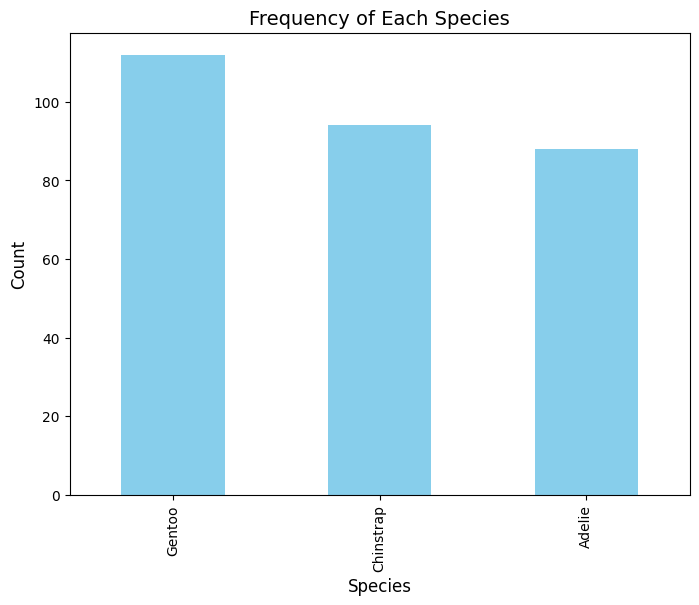

In [14]:
q11_species_column = pddata["species"].value_counts()

print(q11_species_column)

plt.figure(figsize=(8, 6))
q11_species_column.plot(kind= "bar", color = 'skyblue')
plt.title('Frequency of Each Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


Q.12. با استفاده از نمودار اسکتر نشان دهید آیا ارتباطی بین طول بانه و جرم بدن در پنگوئن ها وجود دارد؟ (Using a scatter plot, show if there is a correlation between flipper length and body mass in penguins?)

(نکات اضافه مربوط به سوال: یک نمودار پراکنش رسم کنید که محور ایکس ها طول باله به میلی متر و محور ایگرگ جرم بدن به گرم را نشان می دهد.)

For this questions, we'll grab ```flipper_length_mm``` for x array and ```body_mass_g``` for y array.

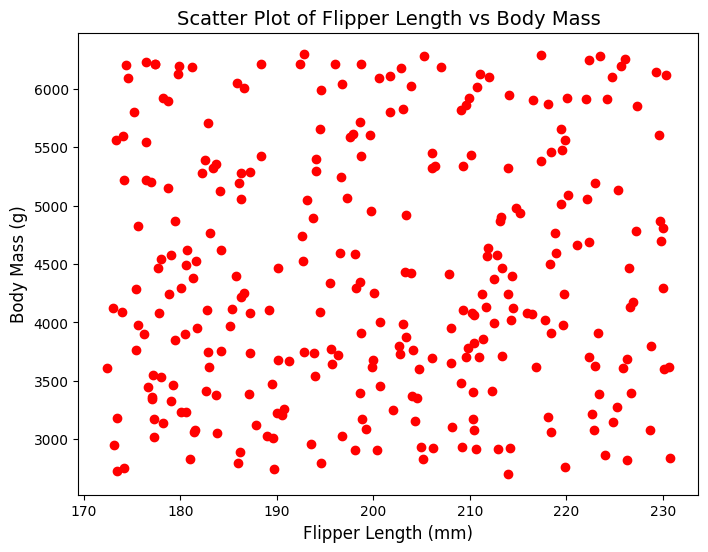

In [15]:

q12_flipper_x = pddata["flipper_length_mm"]
q12_body_mass_g = pddata["body_mass_g"]

plt.figure(figsize=(8, 6))
plt.scatter(q12_flipper_x, q12_body_mass_g, c='red')

plt.title('Scatter Plot of Flipper Length vs Body Mass', fontsize=14)
plt.xlabel('Flipper Length (mm)', fontsize=12)
plt.ylabel('Body Mass (g)', fontsize=12)

plt.show()

Here's the calculation of the correlation using spearman formula:

In [16]:
import scipy.stats as stats

def corjudge(number):
    if number < -0.7:
        return f"Correlation of Flipper and body mass is: {number} that shows a pretty strong negative correlation."
    if -0.7 <= number < -0.3:
        return f"Correlation of Flipper and body mass is: {number} that shows a moderate negative correlation."
    if -0.3 <= number < 0.3:
        return f"Correlation of Flipper and body mass is: {number} that shows a pretty low correlation."
    if 0.3 <= number <= 0.7:
        return f"Correlation of Flipper and body mass is: {number} that shows a moderate correlation."
    if number > 0.7:
        return f"Correlation of Flipper and body mass is: {number} that shows a pretty strong correlation."

q12_res = stats.spearmanr(q12_flipper_x, q12_body_mass_g)
pandasAnswer(corjudge(q12_res.statistic))



----------------------------ANSWER----------------------------

Correlation of Flipper and body mass is: 0.04162594753873089 that shows a pretty low correlation.

-------------------------END OF ANSWER-------------------------



Q.13. با استفاده از نمودار باکس اند ویسکرز عمق نوک پنگوئن های نر و ماده را با هم مقایسه کنید.(Compare culmen_depth_mm of two sexes with boxplot)

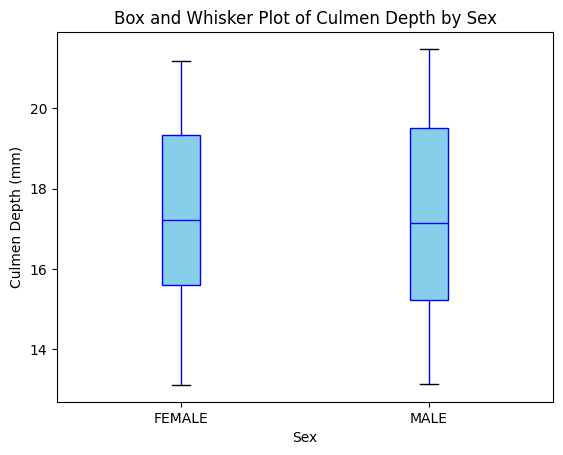

In [ ]:
q13_culmen_depth_mm_sex = pddata.groupby("sex")["culmen_depth_mm"].apply(list)


data = [q13_culmen_depth_mm_sex.iloc[0], q13_culmen_depth_mm_sex.iloc[1]]


plt.boxplot(data, tick_labels=['FEMALE', 'MALE'])


plt.title('Box and Whisker Plot of Culmen Depth by Sex')
plt.ylabel('Culmen Depth (mm)')


plt.show()


A brief explanation:

the top and the bottom of them are both close to each other and we have no putlires so it means that max and min values are the same for both genders.

inside bar itself, the bottom of the female rectangle is a little higher than the male one so it means that female's second quantile is bigger than the male ones. the max variety of male and female ones are near each other so it means that the most repeated length between two sexes are the same. the top of the female rectangle is less than the male one so it means that the third quantile of the male one is more than the female one. The length of the male rectangle is more than the female one so it means that the male length has more veriety.

Q.14. If our data is in the shape of ```(n*m)```, where n is the number of rows, reshape it to ```(n/2 * m2)```.

اگر داده ما

```(n*m)```

باشد و

```n```

تعداد سطر های ما باشد آن را به حالت

```(n/2*m*2)```

در بیاورید.

This question wants us to halve the count of raws and double the count of columns, so we'll do this with ```reshape``` method.

First, we grab numerical columns and we'll create another data frame that's based on numerical columns.
Then, we'll define the current (n*m) and then, we'll reshape the new dataframe.

In [29]:
q14_numeric_columns = pddata.select_dtypes(include=['number']).columns.tolist()


q14_data = pd.DataFrame({
    i: pddata[i] for i in q14_numeric_columns
})

n, m = q14_data.shape

if n % 2 == 0 and m % 2 == 0:
    q14_reshaped = q14_data.values.reshape(n // 2, m * 2)

    new_n, new_m = q14_reshaped.shape

    pandasAnswer(f"Before reshape:\n{q14_data}\ndiv: ({n}X{m})\nAfter Reshape\n{q14_reshaped}\nnew div: ({new_n}X{new_m})")
else:
    pandasAnswer("Cannot reshape as n and m must be even numbers to split and double properly.")



----------------------------ANSWER----------------------------

Before reshape:
     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0           39.641020        16.559920         224.770654  6100.789185
1           52.924312        21.198324         200.424523  2910.212059
2           56.974197        21.204410         181.479774  3060.291164
3           36.457206        14.211573         198.097524  4582.231660
4           53.949836        15.695049         224.175924  5915.503933
..                ...              ...                ...          ...
344         41.898326        16.659695         203.918004  4421.307861
345         46.888493        13.594821         174.195316  2756.567714
346         50.876891        20.188351         214.340542  4398.280301
347         58.894094        20.051153         183.680292  3378.813599
348         35.084555        19.225181         189.667516  3012.745583

[294 rows x 4 columns]
div: (294X4)
After Reshape
[[  39.64101959 

Q.15. مقادیر سلول های نان را با میانگین یا میانه یا مد هر ستون جایگزین کنید. (Replace the NaN values in each column with either the mean, median, or mode of the column. Justify your choice for mean, median, or mode.)

در صورت انتخاب هر کدام از حالت های میانگین یا میانه یا مد برای انتخاب خود دلیل آورید.

میانگین برای وقتی مناسب است که داده ها به طور تقریبی نرمال توزیع شده باشند و مقادیر پرت تاثیری بر نتایج نگذاند. با این شرایط میانگین جایگزین خوبی است.

میانه وثتی مفید است که توضیع نرمال نباشد یا مقادیر افراطی وجود داشته باشد. میانه به علت اینکه تحت تاثیر مقادیر پرت قرار نمیگیرد انتخاب بهتری برای جایگزینی است.

مد وقتی مناسب است که داده ها به طور واضح شامل گروه هایی با مقادیر باشند مد انتخاب مناسبی است.

توابعی تعریف خواهیم کرد که بتواند این ها را تشخیص دهد.

برای تشخیص نرمال بودن از تست شارپیرو ویکی استفاده خواهیم کرد.

Mean is suitable when the data is approximately normally distributed, and extreme values (outliers) do not affect the results. Under these conditions, the mean is a good replacement. 

Median is useful when the distribution is not normal or when there are extreme values. Since the median is not affected by outliers, it is a better choice for replacement.

Mode is suitable when the data clearly contains groups with specific values, making the mode a good choice.

بنابر توضیحات داده شده کد ابتدا حساب می کند هر کالمن در کدام وضعیت بالا قرار دارد و سپس تغییر خود را اعمال می کند.

Based on the provided explanation, the code first determines which category each column falls into, and then applies the appropriate transformation.

------------------------------------------------------------------


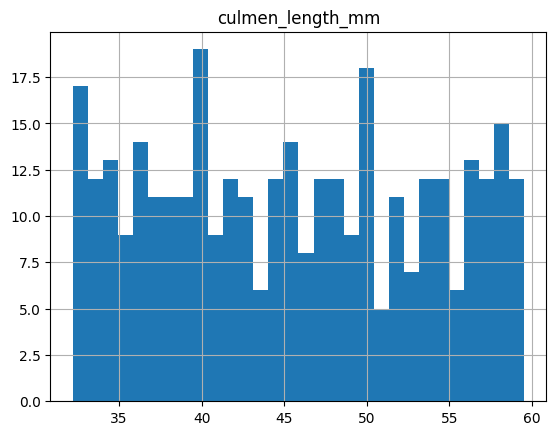

Before: 4 nulls in culmen_length_mm
Data is not normally distributed (Reject H0).
Using median for filling missing values (continuous data).
After: 0 nulls in culmen_length_mm
------------------------------------------------------------------


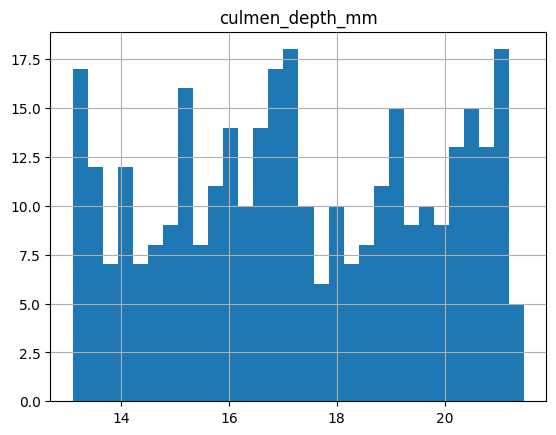

Before: 10 nulls in culmen_depth_mm
Data is not normally distributed (Reject H0).
Using median for filling missing values (continuous data).
After: 0 nulls in culmen_depth_mm
------------------------------------------------------------------


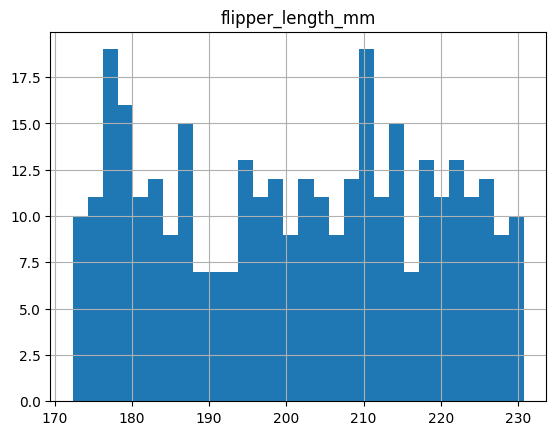

Before: 5 nulls in flipper_length_mm
Data is not normally distributed (Reject H0).
Using median for filling missing values (continuous data).
After: 0 nulls in flipper_length_mm
------------------------------------------------------------------


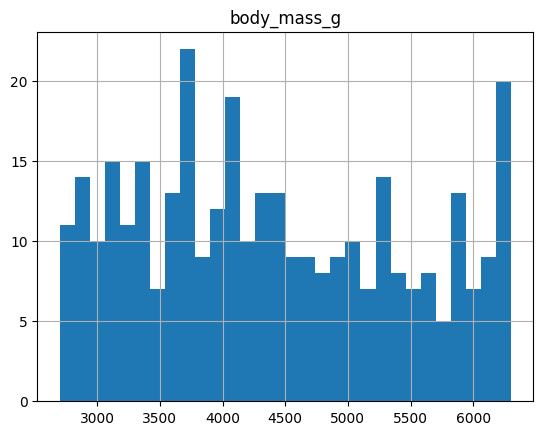

Before: 12 nulls in body_mass_g
Data is not normally distributed (Reject H0).
Using median for filling missing values (continuous data).
After: 0 nulls in body_mass_g


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

q15_numeric_columns = pddataUNCLEAN.select_dtypes(include=['number']).columns.tolist()

for i in q15_numeric_columns:
    print("------------------------------------------------------------------")
    
    non_null_data = pddataUNCLEAN[i].dropna()
    non_null_data.hist(bins=30)
    plt.title(i)
    plt.show()

    data_for_test = pddataUNCLEAN[i].dropna()

    if len(data_for_test) < 3:
        print(f"Not enough data to perform Shapiro-Wilk test for column {i}. Skipping...")
        continue

    stat, p_value = shapiro(data_for_test)
    
    q15_beforeNun = pddataUNCLEAN[i].isnull().sum()
    print(f"Before: {q15_beforeNun} nulls in {i}")
    
    if p_value > 0.05:
        print("Data is normally distributed (Fail to reject H0).")
        mean_value = pddataUNCLEAN[i].mean()
        pddataUNCLEAN[i] = pddataUNCLEAN[i].fillna(mean_value)
    else:
        print("Data is not normally distributed (Reject H0).")
        median_value = pddataUNCLEAN[i].median()
        mode_value = pddataUNCLEAN[i].mode()[0]
        
        if pddataUNCLEAN[i].nunique() < 10:
            print("Using mode for filling missing values (categorical data).")
            pddataUNCLEAN[i] = pddataUNCLEAN[i].fillna(mode_value)
        else:
            print("Using median for filling missing values (continuous data).")
            pddataUNCLEAN[i] = pddataUNCLEAN[i].fillna(median_value)
    
    q15_afterNun = pddataUNCLEAN[i].isnull().sum()
    print(f"After: {q15_afterNun} nulls in {i}")
